In [1]:
import pandas as pd 

In [3]:
df = pd.read_csv('EV_Dataset.csv')  


In [5]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


In [13]:
df.isnull().sum()


Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

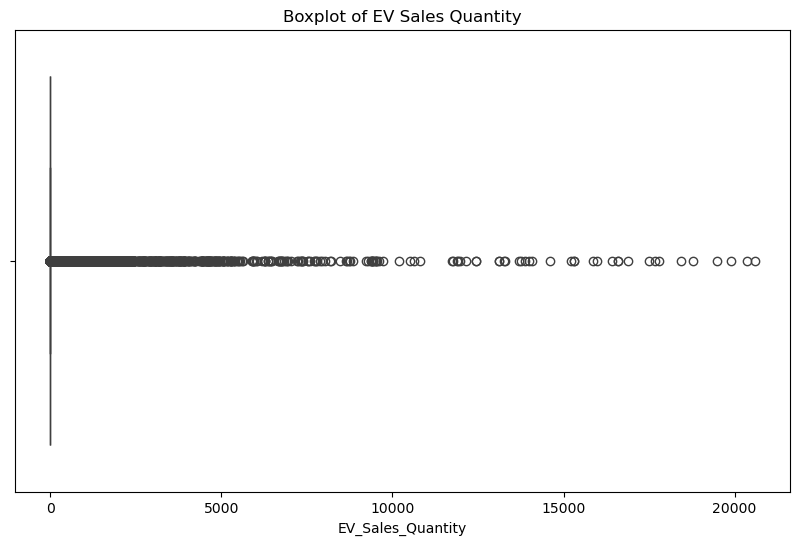

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='EV_Sales_Quantity')
plt.title('Boxplot of EV Sales Quantity')
plt.show()

In [17]:
df['Quarter'] = df['Date'].dt.to_period('Q')


In [19]:
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Quarter
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,2014Q1
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,2014Q1
2,2014.0,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,2014Q1
3,2014.0,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,2014Q1
4,2014.0,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,2014Q1


In [21]:
yearly_sales = df.groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()
monthly_sales = df.groupby(['Year', 'Month_Name', 'State'])['EV_Sales_Quantity'].sum().reset_index()


In [25]:
yearly_sales

,Year,Vehicle_Category,EV_Sales_Quantity
0,2014.0,2-Wheelers,1679.0
1,2014.0,3-Wheelers,12.0
2,2014.0,4-Wheelers,498.0
3,2014.0,Bus,3.0
4,2014.0,Others,200.0
5,2015.0,2-Wheelers,1447.0
6,2015.0,3-Wheelers,5440.0
7,2015.0,4-Wheelers,761.0
8,2015.0,Bus,4.0
9,2015.0,Others,153.0


In [27]:
monthly_sales

,Year,Month_Name,State,EV_Sales_Quantity
0,2014.0,apr,Andaman & Nicobar Island,0.0
1,2014.0,apr,Andhra Pradesh,1.0
2,2014.0,apr,Arunachal Pradesh,0.0
3,2014.0,apr,Assam,0.0
4,2014.0,apr,Bihar,4.0
...,...,...,...,...
4107,2024.0,jan,Tamil Nadu,8715.0
4108,2024.0,jan,Tripura,507.0
4109,2024.0,jan,Uttar Pradesh,27833.0
4110,2024.0,jan,Uttarakhand,1234.0


In [31]:
vehicle_type_distribution = df['Vehicle_Type'].value_counts(normalize=True)
vehicle_type_distribution

Vehicle_Type
Others                0.561960
2W_Personal           0.120812
Bus                   0.072549
4W_Shared             0.047292
4W_Personal           0.042449
3W_Shared             0.039093
3W_Goods              0.033125
Institution Bus       0.021612
3W_Shared_LowSpeed    0.020146
3W_Goods_LowSpeed     0.015664
2W_Shared             0.014673
3W_Personal           0.010625
Name: proportion, dtype: float64

In [33]:
regional_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).reset_index()
regional_sales

,State,EV_Sales_Quantity
0,Uttar Pradesh,732074.0
1,Maharashtra,401535.0
2,Karnataka,315498.0
3,Delhi,268538.0
4,Rajasthan,228573.0
5,Bihar,213465.0
6,Tamil Nadu,206902.0
7,Gujarat,176713.0
8,Assam,151917.0
9,Kerala,133246.0


In [35]:
category_sales = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().sort_values(ascending=False).reset_index()
category_sales

,Vehicle_Category,EV_Sales_Quantity
0,2-Wheelers,1808105.0
1,3-Wheelers,1620310.0
2,4-Wheelers,149775.0
3,Others,8612.0
4,Bus,7009.0


In [37]:
type_sales = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False).reset_index()
type_sales


,Vehicle_Type,EV_Sales_Quantity
0,2W_Personal,1796340.0
1,3W_Shared_LowSpeed,1408127.0
2,4W_Personal,130676.0
3,3W_Goods_LowSpeed,90656.0
4,3W_Shared,76132.0
5,3W_Goods,44974.0
6,4W_Shared,19099.0
7,2W_Shared,11765.0
8,Others,8612.0
9,Bus,7009.0


In [39]:
yearly_trend = df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
quarterly_trend = df.groupby('Quarter')['EV_Sales_Quantity'].sum().reset_index()
yearly_trend

,Year,EV_Sales_Quantity
0,2014.0,2392.0
1,2015.0,7805.0
2,2016.0,49855.0
3,2017.0,87420.0
4,2018.0,130254.0
5,2019.0,166819.0
6,2020.0,124684.0
7,2021.0,331498.0
8,2022.0,1024723.0
9,2023.0,1525179.0


In [41]:
quarterly_trend

,Quarter,EV_Sales_Quantity
0,2014Q1,623.0
1,2014Q2,587.0
2,2014Q3,547.0
3,2014Q4,635.0
4,2015Q1,578.0
5,2015Q2,657.0
6,2015Q3,2062.0
7,2015Q4,4508.0
8,2016Q1,8965.0
9,2016Q2,12566.0


In [75]:
top_states = ['Uttar Pradesh', 'Maharashtra', 'Karnataka']
state_monthly_sales = df[(df['Vehicle_Category'] == '2-Wheelers') & (df['State'].isin(top_states))]
monthly_trend = state_monthly_sales.groupby(['State', 'Year', 'Month_Name'])['EV_Sales_Quantity'].sum().unstack().fillna(0)
print(monthly_trend.head())

Month_Name         apr    aug    dec   feb   jan    jul    jun   mar   may  \
State     Year                                                               
Karnataka 2014.0  27.0    9.0   27.0  10.0  24.0   23.0   17.0  23.0   9.0   
          2015.0   6.0    9.0    3.0   7.0  13.0    7.0    9.0  10.0   5.0   
          2016.0  10.0    8.0    2.0   9.0   5.0    8.0    5.0   3.0   4.0   
          2017.0   3.0    2.0   25.0   1.0   2.0    1.0    0.0   7.0   4.0   
          2018.0  59.0  174.0  141.0   8.0   7.0  100.0  122.0  33.0  99.0   

Month_Name          nov    oct    sep  
State     Year                         
Karnataka 2014.0   22.0   18.0   11.0  
          2015.0    6.0   15.0   10.0  
          2016.0    8.0    3.0    2.0  
          2017.0    5.0    8.0    4.0  
          2018.0  253.0  158.0  239.0  


In [77]:
state_monthly_sales

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Quarter
291,2014.0,jan,2014-01-01,Karnataka,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,18.0,2014Q1
292,2014.0,jan,2014-01-01,Karnataka,M-CYCLE/SCOOTER-WITH SIDE CAR,2-Wheelers,2W_Personal,0.0,2014Q1
294,2014.0,jan,2014-01-01,Karnataka,MOPED,2-Wheelers,2W_Personal,6.0,2014Q1
297,2014.0,jan,2014-01-01,Karnataka,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,0.0,2014Q1
298,2014.0,jan,2014-01-01,Karnataka,MOTORISED CYCLE (CC > 25CC),2-Wheelers,2W_Personal,0.0,2014Q1
...,...,...,...,...,...,...,...,...,...
96659,2023.0,dec,2023-12-01,Uttar Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,5379.0,2023Q4
96660,2023.0,dec,2023-12-01,Uttar Pradesh,M-CYCLE/SCOOTER-WITH SIDE CAR,2-Wheelers,2W_Personal,1.0,2023Q4
96662,2023.0,dec,2023-12-01,Uttar Pradesh,MOPED,2-Wheelers,2W_Personal,5.0,2023Q4
96665,2023.0,dec,2023-12-01,Uttar Pradesh,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,15.0,2023Q4


In [79]:
state_yearly_sales = state_monthly_sales.groupby(['State', 'Year'])['EV_Sales_Quantity'].sum().reset_index()
state_yearly_sales['Growth_Rate'] = state_yearly_sales.groupby('State')['EV_Sales_Quantity'].pct_change() * 100


In [81]:
state_yearly_sales = state_monthly_sales.groupby(['State', 'Year'])['EV_Sales_Quantity'].sum().reset_index()
state_yearly_sales['Growth_Rate'] = state_yearly_sales.groupby('State')['EV_Sales_Quantity'].pct_change() * 100
print(state_yearly_sales.head())

       State    Year  EV_Sales_Quantity  Growth_Rate
0  Karnataka  2014.0              220.0          NaN
1  Karnataka  2015.0              100.0   -54.545455
2  Karnataka  2016.0               67.0   -33.000000
3  Karnataka  2017.0               62.0    -7.462687
4  Karnataka  2018.0             1393.0  2146.774194


In [83]:
class_distribution = state_monthly_sales.groupby(['State', 'Vehicle_Class'])['EV_Sales_Quantity'].sum().unstack().fillna(0)


In [85]:
class_distribution

Vehicle_Class,M-CYCLE/SCOOTER,M-CYCLE/SCOOTER-WITH SIDE CAR,MOPED,MOTOR CYCLE/SCOOTER-USED FOR HIRE,MOTORISED CYCLE (CC > 25CC)
State,,,,,
Karnataka,254789.0,261.0,6541.0,11493.0,5587.0
Maharashtra,330422.0,7.0,11670.0,5.0,132.0
Uttar Pradesh,80864.0,56.0,518.0,35.0,2296.0


In [87]:
vehicle_class_state_sales = df.groupby(['Vehicle_Class', 'State'])['EV_Sales_Quantity'].sum().reset_index()
print(vehicle_class_state_sales.sort_values(by='EV_Sales_Quantity', ascending=False).head(10))


       Vehicle_Class          State  EV_Sales_Quantity
499    E-RICKSHAW(P)  Uttar Pradesh           596325.0
853  M-CYCLE/SCOOTER    Maharashtra           330422.0
849  M-CYCLE/SCOOTER      Karnataka           254789.0
475    E-RICKSHAW(P)          Bihar           174880.0
863  M-CYCLE/SCOOTER     Tamil Nadu           160096.0
844  M-CYCLE/SCOOTER        Gujarat           141152.0
474    E-RICKSHAW(P)          Assam           137982.0
479    E-RICKSHAW(P)          Delhi           134439.0
861  M-CYCLE/SCOOTER      Rajasthan           129813.0
850  M-CYCLE/SCOOTER         Kerala           107840.0


In [89]:
vehicle_class_state_sales['Growth_Rate'] = vehicle_class_state_sales.groupby('State')['EV_Sales_Quantity'].pct_change() * 100
print(vehicle_class_state_sales.sort_values(by='Growth_Rate', ascending=False).head(10))


      Vehicle_Class              State  EV_Sales_Quantity  Growth_Rate
1759      X-RAY VAN      Uttar Pradesh                1.0          inf
726   GOODS CARRIER   Himachal Pradesh               15.0          inf
735   GOODS CARRIER          Meghalaya                2.0          inf
734   GOODS CARRIER            Manipur                1.0          inf
732   GOODS CARRIER     Madhya Pradesh               87.0          inf
730   GOODS CARRIER             Kerala               92.0          inf
729   GOODS CARRIER          Karnataka              314.0          inf
728   GOODS CARRIER          Jharkhand               23.0          inf
727   GOODS CARRIER  Jammu and Kashmir                2.0          inf
722   GOODS CARRIER              Delhi              408.0          inf


In [121]:
vehicle_class_state_sales_filtered = vehicle_class_state_sales[vehicle_class_state_sales['Growth_Rate'] != float('inf')]
vehicle_class_state_sales_filtered = vehicle_class_state_sales_filtered.sort_values(by='Growth_Rate', ascending=False)
print(vehicle_class_state_sales_filtered.head(10))
# Total EV Sales by State
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()

# Sort by sales in descending order for better comparison
state_sales_sorted = state_sales.sort_values('EV_Sales_Quantity', ascending=False)

# Display the state-wise sales
print(state_sales_sorted.head())


                          Vehicle_Class         State  EV_Sales_Quantity  \
853                     M-CYCLE/SCOOTER   Maharashtra           330422.0   
849                     M-CYCLE/SCOOTER     Karnataka           254789.0   
1094                          MOTOR CAR           Goa             1921.0   
1150  MOTOR CYCLE/SCOOTER-USED FOR HIRE     Karnataka            11493.0   
1186        MOTORISED CYCLE (CC > 25CC)     Karnataka             5587.0   
1181        MOTORISED CYCLE (CC > 25CC)       Gujarat              545.0   
854                     M-CYCLE/SCOOTER       Manipur              285.0   
1084                          MOTOR CAB   West Bengal              542.0   
725                       GOODS CARRIER       Haryana              204.0   
1428              THREE WHEELER (GOODS)  Chhattisgarh              771.0   

       Growth_Rate  
853   3.304210e+07  
849   1.158032e+06  
1094  9.595000e+04  
1150  8.830769e+04  
1186  7.971429e+04  
1181  5.440000e+04  
854   2.840000e+

In [119]:
# Total EV Sales by Year
yearly_sales = df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()

# Total EV Sales by Month (Aggregate over the years)
monthly_sales = df.groupby('Month_Name')['EV_Sales_Quantity'].sum().reset_index()

# Display Yearly and Monthly sales data
print(yearly_sales.head())
print(monthly_sales.head())



     Year  EV_Sales_Quantity
0  2014.0             2392.0
1  2015.0             7805.0
2  2016.0            49855.0
3  2017.0            87420.0
4  2018.0           130254.0
  Month_Name  EV_Sales_Quantity
0        apr           232194.0
1        aug           294022.0
2        dec           364558.0
3        feb           228739.0
4        jan           360703.0


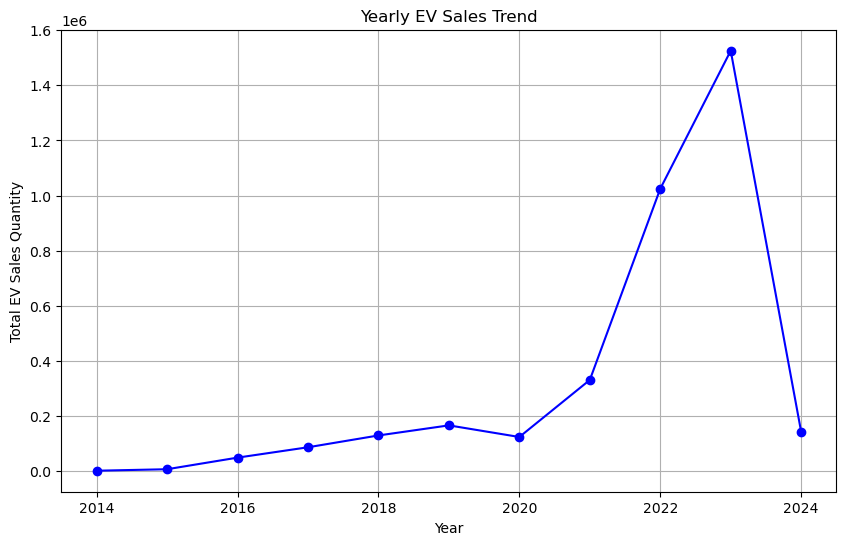

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['EV_Sales_Quantity'], marker='o', linestyle='-', color='b')
plt.title('Yearly EV Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total EV Sales Quantity')
plt.grid(True)
plt.show()


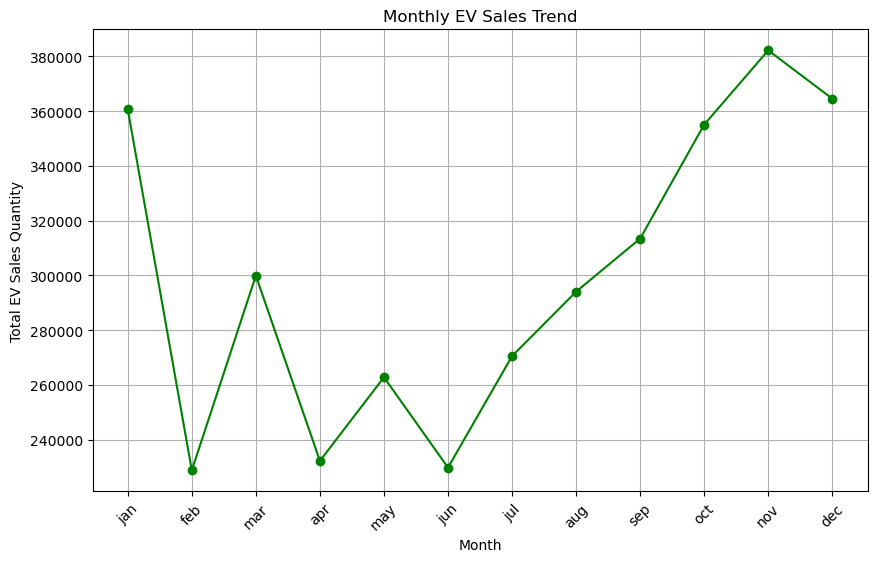

In [129]:

monthly_sales_sorted = monthly_sales.set_index('Month_Name').reindex(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted.index, monthly_sales_sorted['EV_Sales_Quantity'], marker='o', linestyle='-', color='g')
plt.title('Monthly EV Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total EV Sales Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


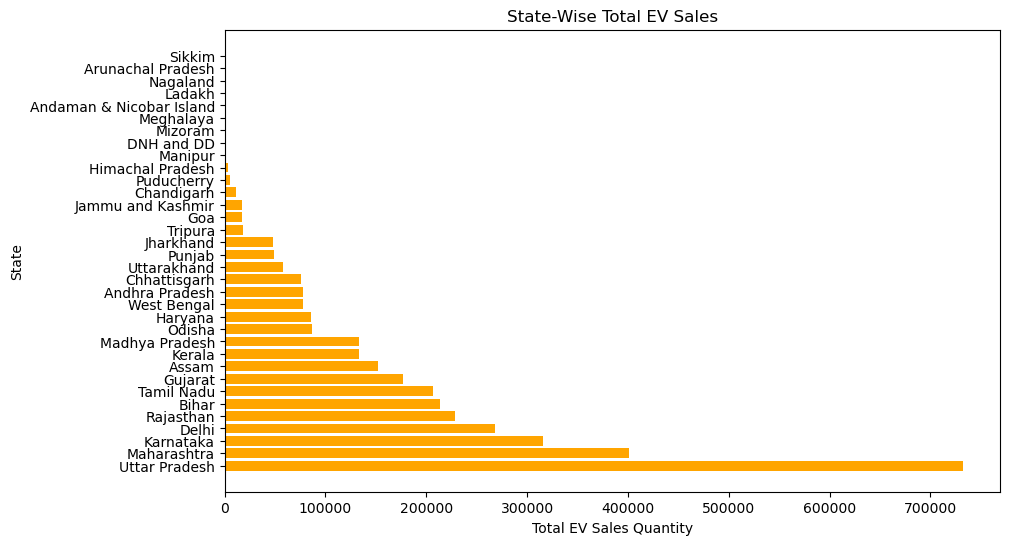

In [131]:
plt.figure(figsize=(10, 6))
plt.barh(state_sales_sorted['State'], state_sales_sorted['EV_Sales_Quantity'], color='orange')
plt.title('State-Wise Total EV Sales')
plt.xlabel('Total EV Sales Quantity')
plt.ylabel('State')
plt.show()


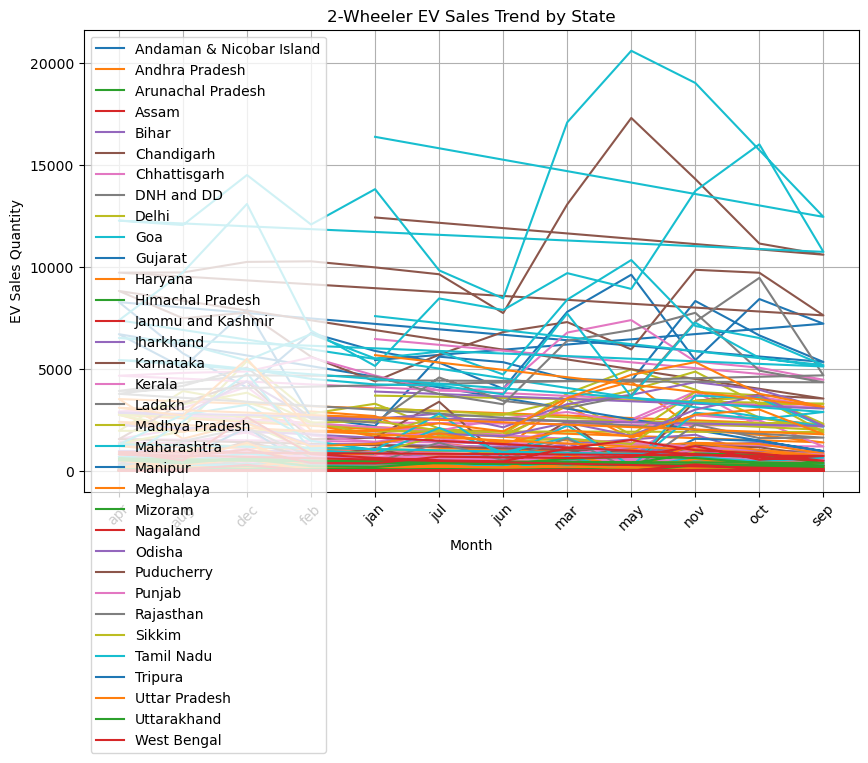

In [135]:
# Filter for 2-Wheelers and retain the 'State' column
two_wheeler_sales = df[df['Vehicle_Category'] == '2-Wheelers'][['Year', 'Month_Name', 'State', 'EV_Sales_Quantity']]

# Group by Year, Month, and State, then sum the EV sales
two_wheeler_sales_grouped = two_wheeler_sales.groupby(['Year', 'Month_Name', 'State'])['EV_Sales_Quantity'].sum().reset_index()

# Plot the 2-Wheeler Sales Trend
plt.figure(figsize=(10, 6))
for state in two_wheeler_sales_grouped['State'].unique():
    state_sales = two_wheeler_sales_grouped[two_wheeler_sales_grouped['State'] == state]
    plt.plot(state_sales['Month_Name'], state_sales['EV_Sales_Quantity'], label=state)

plt.title('2-Wheeler EV Sales Trend by State')
plt.xlabel('Month')
plt.ylabel('EV Sales Quantity')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



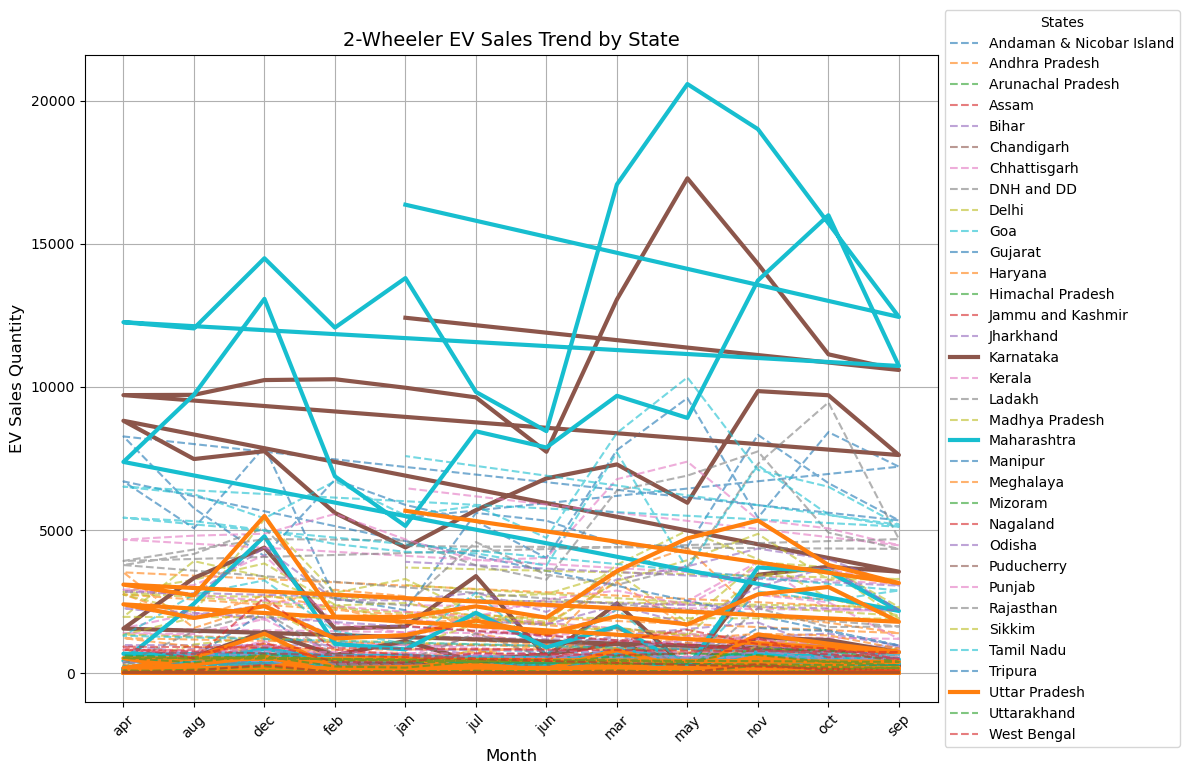

In [137]:
# Define top 3 states
top_states = ['Uttar Pradesh', 'Maharashtra', 'Karnataka']

# Plot the 2-Wheeler Sales Trend with customized legends and highlighting the top states
plt.figure(figsize=(12, 8))

for state in two_wheeler_sales_grouped['State'].unique():
    state_sales = two_wheeler_sales_grouped[two_wheeler_sales_grouped['State'] == state]
    
    # Check if the state is one of the top 3 states
    if state in top_states:
        plt.plot(state_sales['Month_Name'], state_sales['EV_Sales_Quantity'], label=state, linewidth=3)
    else:
        plt.plot(state_sales['Month_Name'], state_sales['EV_Sales_Quantity'], label=state, linestyle='--', alpha=0.6)

# Customize the chart title, labels, and legend
plt.title('2-Wheeler EV Sales Trend by State', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)

# Move the legend outside of the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="States", fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and show the plot
plt.grid(True)
plt.tight_layout()  # Ensure the chart fits well
plt.show()


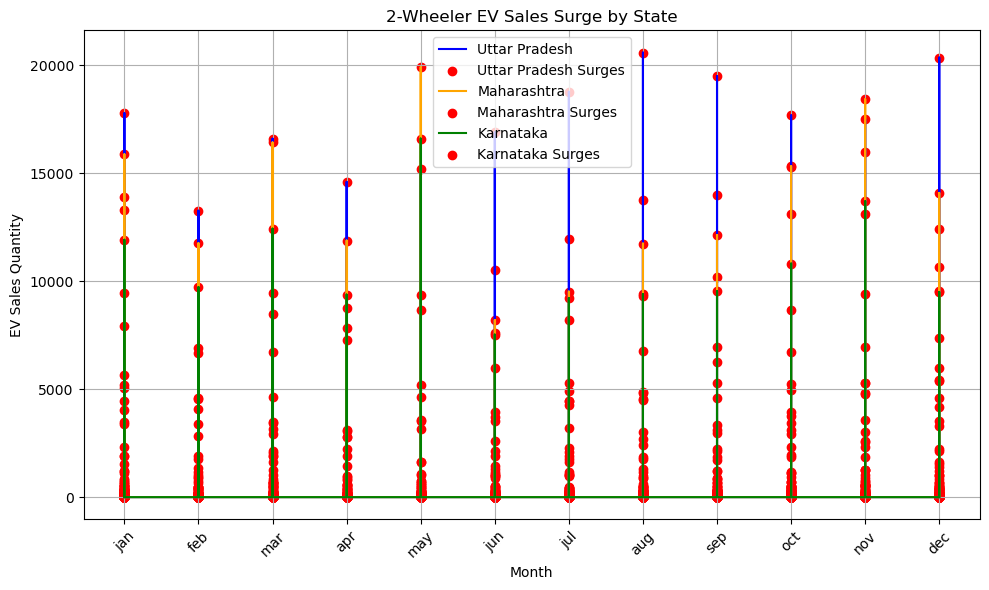

In [141]:
# Define distinct colors for the three top states
color_map = {
    'Uttar Pradesh': 'blue', 
    'Maharashtra': 'orange', 
    'Karnataka': 'green'
}

# Plotting with distinct colors for the top-performing states
plt.figure(figsize=(10, 6))

for state in ['Uttar Pradesh', 'Maharashtra', 'Karnataka']:
    state_data = df_top_states[df_top_states['State'] == state]
    plt.plot(state_data['Month_Name'], state_data['EV_Sales_Quantity'], label=state, color=color_map[state])
    plt.scatter(state_data[state_data['Surge']]['Month_Name'], state_data[state_data['Surge']]['EV_Sales_Quantity'], color='red', label=f'{state} Surges')

plt.title('2-Wheeler EV Sales Surge by State')
plt.xlabel('Month')
plt.ylabel('EV Sales Quantity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


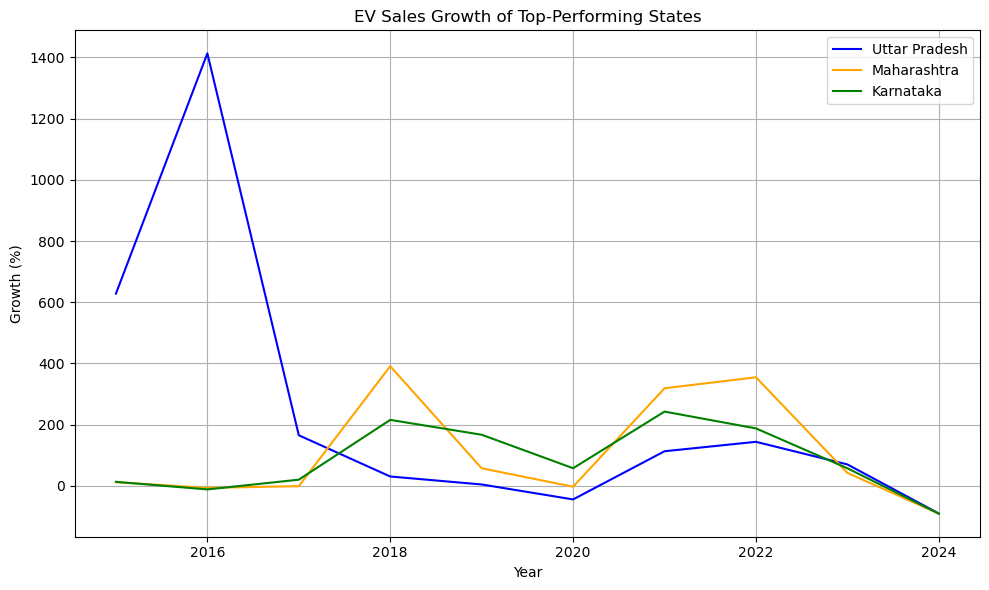

In [145]:
# Define distinct colors for the top states
color_map_growth = {
    'Uttar Pradesh': 'blue', 
    'Maharashtra': 'orange', 
    'Karnataka': 'green'
}

# Plotting Growth with distinct colors
plt.figure(figsize=(10, 6))

for state in top_states:
    state_growth = df_growth[df_growth['State'] == state]
    plt.plot(state_growth['Year'], state_growth['Growth'], label=state, color=color_map_growth[state])

plt.title('EV Sales Growth of Top-Performing States')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

